# Import libraries, data

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBClassifier
import statsmodels.formula.api as sm

In [3]:
data = pd.read_csv("C:/Users/TIGER/Desktop/icdss/Challenges-master/Challenges-master/churn-prediction/churn-prediction.csv")

In [69]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenuretimesContract,OnlineServices,PD
0,7590-VHVEG,0,0,1,0,0,0,2,2,0,...,0,0,1,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,2,1,0,2,1,...,0,1,0,1,1,1,0,2,0,0
2,3668-QPYBK,1,0,0,0,0,1,0,2,1,...,0,0,1,1,1,0,1,0,0,0
3,7795-CFOCW,1,0,0,0,3,0,2,2,1,...,0,1,0,2,1,1,0,3,0,0
4,9237-HQITU,0,0,0,0,0,1,0,1,0,...,0,0,1,0,2,0,1,0,0,0


In [5]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [6]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,0434-CSFON,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data cleaning

In [8]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
for feature in {'Partner','Dependents','PhoneService','PaperlessBilling','Churn'}:
    data[feature] = data[feature].map({'No':0, 'Yes':1})
data['gender'] = data['gender'].map({'Female':0, 'Male':1})
data['MultipleLines'] = data['MultipleLines'].map({'No':0, 'Yes':1, 'No phone service':2})
data['InternetService'] = data['InternetService'].map({'No':0, 'Fiber optic':1, 'DSL':2}) 
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
data['OnlineBackup'] = data['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
data['DeviceProtection'] = data['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
data['TechSupport'] = data['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
data['StreamingTV'] = data['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
data['StreamingMovies'] = data['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})
data['Contract'] = data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [12]:
data['tenureband'] = pd.cut(data['tenure'],5)
data['tenureband'].unique()

[(-0.072, 14.4], (28.8, 43.2], (43.2, 57.6], (14.4, 28.8], (57.6, 72.0]]
Categories (5, interval[float64]): [(-0.072, 14.4] < (14.4, 28.8] < (28.8, 43.2] < (43.2, 57.6] < (57.6, 72.0]]

In [13]:
data['tenure'].astype('float')
data.loc[data['tenure'] <= 14.4, 'tenure'] = 0
data.loc[(data['tenure'] > 14.4) & (data['tenure'] <= 28.8) , 'tenure'] = 1
data.loc[(data['tenure'] > 28.8) & (data['tenure'] <= 43.2) , 'tenure'] = 2
data.loc[(data['tenure'] > 43.2) & (data['tenure'] <= 57.6) , 'tenure'] = 3
data.loc[data['tenure'] > 57.6 , 'tenure'] = 4

In [14]:
data['MonthlyChargesband'] = pd.cut(data['MonthlyCharges'],5)
data['MonthlyChargesband'].unique()

[(18.15, 38.35], (38.35, 58.45], (58.45, 78.55], (98.65, 118.75], (78.55, 98.65]]
Categories (5, interval[float64]): [(18.15, 38.35] < (38.35, 58.45] < (58.45, 78.55] < (78.55, 98.65] < (98.65, 118.75]]

In [15]:
data['MonthlyCharges'].astype('float')
data.loc[data['MonthlyCharges'] <= 38.35, 'MonthlyCharges'] = 0
data.loc[(data['MonthlyCharges'] > 38.35) & (data['MonthlyCharges'] <= 58.45) , 'MonthlyCharges'] = 1
data.loc[(data['MonthlyCharges'] > 58.45) & (data['MonthlyCharges'] <= 78.55) , 'MonthlyCharges'] = 2
data.loc[(data['MonthlyCharges'] > 78.55) & (data['MonthlyCharges'] <= 98.65) , 'MonthlyCharges'] = 3
data.loc[data['MonthlyCharges'] > 98.65 , 'MonthlyCharges'] = 4

In [21]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalChargesband'] = pd.cut(data['TotalCharges'],5)
data['TotalChargesband'].unique()

[(-8.685, 1736.96], (1736.96, 3473.92], (3473.92, 5210.88], (5210.88, 6947.84], (6947.84, 8684.8]]
Categories (5, interval[float64]): [(-8.685, 1736.96] < (1736.96, 3473.92] < (3473.92, 5210.88] < (5210.88, 6947.84] < (6947.84, 8684.8]]

In [22]:
data.loc[data['TotalCharges'] <= 1736.96, 'TotalCharges'] = 0
data.loc[(data['TotalCharges'] > 1736.96) & (data['TotalCharges'] <= 3473.92) , 'TotalCharges'] = 1
data.loc[(data['TotalCharges'] > 3473.92) & (data['TotalCharges'] <= 5210.88) , 'TotalCharges'] = 2
data.loc[(data['TotalCharges'] > 5210.88) & (data['TotalCharges'] <= 6947.84) , 'TotalCharges'] = 3
data.loc[data['TotalCharges'] > 6947.84 , 'TotalCharges'] = 4

In [23]:
data = data.drop(['tenureband','MonthlyChargesband','TotalChargesband'], axis = 1)

In [24]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype(int)
data['TotalCharges'] = data['TotalCharges'].astype(int)

In [25]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.503905,0.162147,0.481755,0.298026,1.758484,0.901888,0.614369,1.125657,0.717734,0.775948,0.774954,0.721284,0.815420,0.819395,0.687491,0.591793,1.313503,1.902598,0.914525,0.265370
std,0.500020,0.368612,0.499702,0.457424,1.580294,0.297487,0.655805,0.738040,0.796440,0.778186,0.778538,0.795461,0.763038,0.761382,0.832727,0.491537,1.149799,1.418083,1.232232,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0,0,2,2,0,...,0,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,2,1,0,2,1,...,1,0,0,0,1,0,1,1,1,0
2,3668-QPYBK,1,0,0,0,0,1,0,2,1,...,0,0,0,0,0,1,1,1,0,1
3,7795-CFOCW,1,0,0,0,3,0,2,2,1,...,1,1,0,0,1,0,2,1,1,0
4,9237-HQITU,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,2,0,1


# EDA

In [27]:
data['tenuretimesContract'] = data['tenure']*data['Contract']

Use bitwise and to create new feature 'OnlineServices':
1 denotes all services are used, 2 denotes no internet service, 0 otherwise

In [28]:
data['OnlineServices'] = data['OnlineSecurity'] & data['OnlineBackup'] & data['DeviceProtection'] & data['TechSupport'] & data['StreamingTV'] & data['StreamingMovies']

Use bitwise and to create new feature 'PD': 1 denotes have both partner and dependents, 0 otherwise

In [29]:
data['PD'] = data['Partner'] & data['Dependents']


Totalcharge = tenure * monthlycharge
### Heatmap

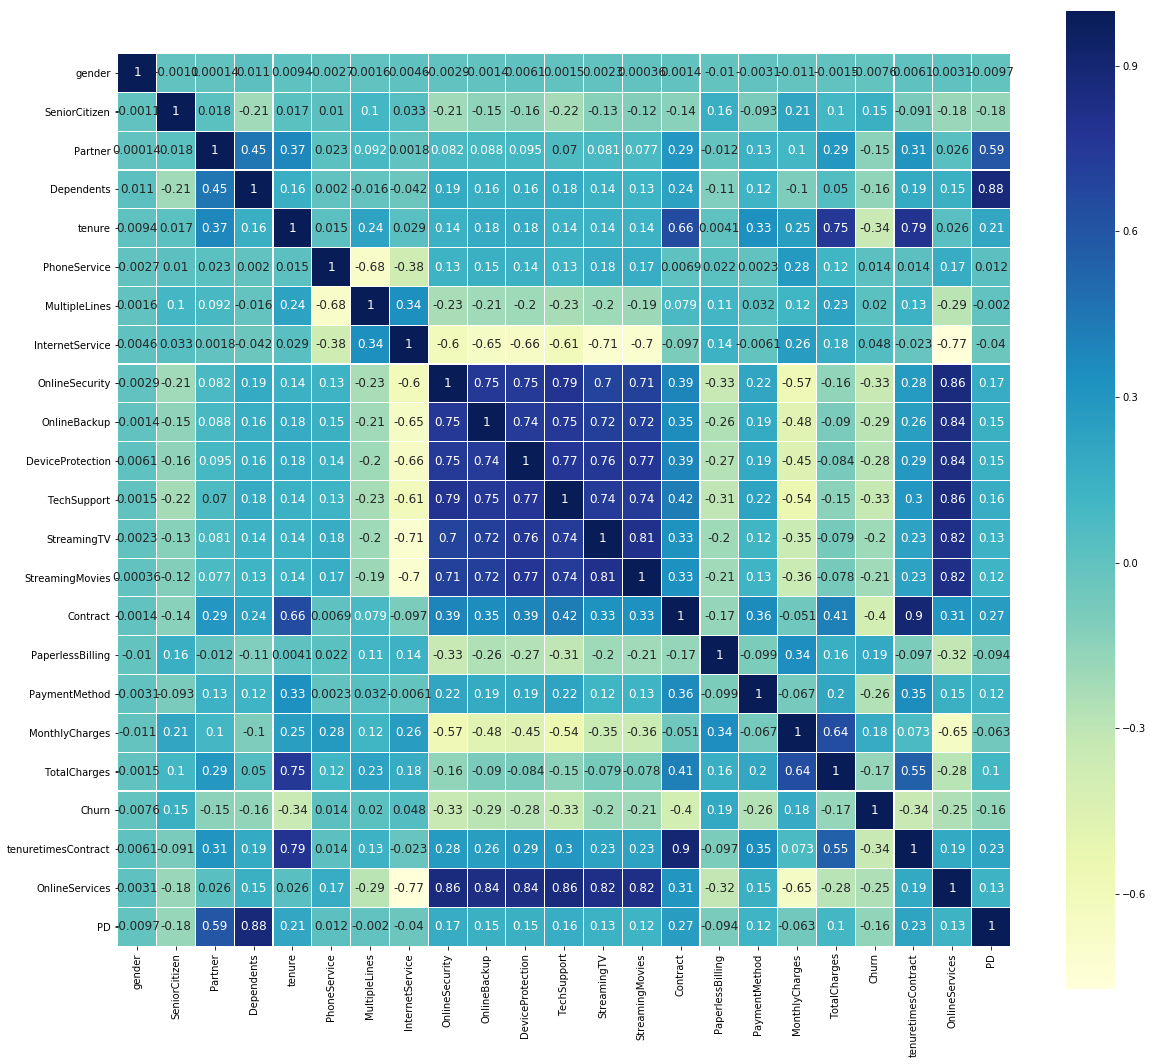

In [30]:
plt.rcParams["figure.figsize"]=20,20
sns.heatmap(data.corr(),cmap = "YlGnBu",square=True, cbar_kws={'shrink':.9 }, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })

- Type of contract has relatively high correlation with chrum
- The six features in the middle have high correlation pairwise

# Model

split the data into train and test dataset

In [31]:
Y = data['Churn']
X = data.drop(['customerID','Churn'], axis = 1)

In [32]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenuretimesContract,OnlineServices,PD
0,0,0,1,0,0,0,2,2,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,2,1,0,2,1,0,...,0,0,1,0,1,1,1,2,0,0
2,1,0,0,0,0,1,0,2,1,1,...,0,0,0,1,1,1,0,0,0,0
3,1,0,0,0,3,0,2,2,1,0,...,0,0,1,0,2,1,1,3,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,2,0,0,0,0


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

Use logistic regression first to validate the assumptions and decisions for feature creating

In [76]:
logreg = LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_pred, Y_test)*100, 2)

In [77]:
acc_log

80.9

In [37]:
model = sm.Logit(Y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.423630
         Iterations 7


In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4718
Model:                          Logit   Df Residuals:                     4696
Method:                           MLE   Df Model:                           21
Date:                Sat, 27 Oct 2018   Pseudo R-squ.:                  0.2648
Time:                        00:37:01   Log-Likelihood:                -1998.7
converged:                       True   LL-Null:                       -2718.5
                                        LLR p-value:                2.901e-292
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender                 -0.0642      0.078     -0.822      0.411      -0.217       0.089
SeniorCitizen           0.2143      0.103      2.090      0.037       0.013       0.415
Partner                -0.0407      0.104     -0.392      0.695      -0.244       0.163
Dependents             -0.1829      0.185     -0.986      0.324      -0.546       0.181
tenure                 -0.5319      0.067     -7.926      0.000      -0.663      -0.400
PhoneService           -0.0425      0.226     -0.188      0.851      -0.485       0.400
MultipleLines           0.2882      0.088      3.259      0.001       0.115       0.461
InternetService        -0.3116      0.092     -3.392      0.001      -0.492      -0.132
OnlineSecurity         -0.5055      0.104     -4.878      0.000      -0.709      -0.302
OnlineBackup           -0.2644      0.093     -2.854      0.004      -0.446      -0.083
DeviceProtection       -0.0331      0.097     -0.340      0.734      -0.224       0.157
TechSupport            -0.3692      0.105     -3.525      0.000      -0.574      -0.164
StreamingTV            -0.0141      0.104     -0.135      0.892      -0.218       0.190
StreamingMovies         0.1909      0.105      1.823      0.068      -0.014       0.396
Contract               -1.4502      0.198     -7.340      0.000      -1.837      -1.063
PaperlessBilling        0.3306      0.088      3.745      0.000       0.158       0.504
PaymentMethod          -0.1354      0.037     -3.705      0.000      -0.207      -0.064
MonthlyCharges          0.2834      0.081      3.505      0.000       0.125       0.442
TotalCharges            0.1083      0.088      1.227      0.220      -0.065       0.281
tenuretimesContract     0.2268      0.061      3.704      0.000       0.107       0.347
OnlineServices          0.3735      0.292      1.277      0.202      -0.200       0.947
PD                      0.1107      0.224      0.495      0.621      -0.328       0.549
=======================================================================================
"""

Set the critical point at 10%, by looking at the p-values of the features, I will drop some features.

In [39]:
X_new_train = X_train.drop(['gender','Partner','Dependents','PhoneService','DeviceProtection','StreamingTV','TotalCharges','OnlineServices','PD'], axis = 1)
X_new_test = X_test.drop(['gender','Partner','Dependents','PhoneService','DeviceProtection','StreamingTV','TotalCharges','OnlineServices','PD'], axis = 1)

In [40]:
logreg.fit(X_new_train, Y_train)
Y_pred = logreg.predict(X_new_test)
acc_log = round(accuracy_score(Y_pred, Y_test)*100, 2)

In [41]:
acc_log

81.08

The score did increase a little.

Now, I will try other models.

In [42]:
svc = SVC()
svc.fit(X_new_train, Y_train)
Y_pred = svc.predict(X_new_test)
acc_svc = round(accuracy_score(Y_pred, Y_test)*100, 2)
acc_svc

80.9

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_new_train, Y_train)
Y_pred = knn.predict(X_new_test)
acc_knn = round(accuracy_score(Y_pred, Y_test)*100, 2)
acc_knn

76.82

In [44]:
gaussian = GaussianNB()
gaussian.fit(X_new_train, Y_train)
Y_pred = gaussian.predict(X_new_test)
acc_gaussian = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_gaussian

70.06

In [66]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=400, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_new_train, Y_train)
Y_pred = xgb.predict(X_new_test)
acc_xgb = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_xgb

C:\Users\TIGER\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


80.95

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_new_train, Y_train)
Y_pred = random_forest.predict(X_new_test)
acc_rdf = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_rdf

78.15

Logisitc regression has the highest score, so I will apply random search on the parameters of logistic regression.

In [78]:
params = {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2']
        }
folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True)
random_search = RandomizedSearchCV(logreg, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_new_train,Y_train), verbose=3)
random_search.fit(X_new_train, Y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'penalty': 'l2', 'C': 1000}


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.0s finished


In [81]:
logreg = LogisticRegression(C=1000, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001)
logreg.fit(X_new_train, Y_train)
Y_pred = logreg.predict(X_new_test)
acc_log = round(accuracy_score(Y_pred, Y_test)*100, 2)
acc_log

81.12

Again, the score is increased by a little.

# Conclusion

As we can see from the summary of the logistic regression model. Apart from tenure, contract, which suggests the customer's loyalty, Online services(MultipleLines, InternetService, OnlineSecurity, OnlineBackup), paperless billing, payment method have the lowest p-values. Also, the heatmap illustrates that not having online services has high correlation with customer churn. I would suggest the business to encourage their users to use more online services to avoid customer churn.